### Objective: Analyze campaign performance.

In [143]:
import pandas as pd
import numpy as np

In [144]:
df = pd.read_csv('DATA.csv')
for col in df.columns:
  print(f'{col}: null count: {df[col].isna().sum()}, dtype: {type(df[col][0])}')

experiment_id: null count: 0, dtype: <class 'numpy.int64'>
created_date: null count: 0, dtype: <class 'str'>
spent: null count: 0, dtype: <class 'numpy.float64'>
impressions: null count: 2, dtype: <class 'numpy.float64'>
leads: null count: 0, dtype: <class 'numpy.int64'>
mqls: null count: 0, dtype: <class 'numpy.int64'>
daily_budget: null count: 0, dtype: <class 'numpy.float64'>
experiment_goal: null count: 0, dtype: <class 'str'>
wiz_campaign_channel: null count: 0, dtype: <class 'str'>
offer_library_type: null count: 0, dtype: <class 'str'>
ad_library_type: null count: 0, dtype: <class 'str'>


In [145]:
df['created_date'] = pd.to_datetime(df['created_date'], format='%m/%d/%y')
# df_sorted = df.sort_values(by='created_date')

#EDA

In [146]:
df

,experiment_id,created_date,spent,impressions,leads,mqls,daily_budget,experiment_goal,wiz_campaign_channel,offer_library_type,ad_library_type
0,1177400,2023-07-11,46.94,311.0,0,0,9.23,CPL,LINKEDIN,LG,IMAGE
1,1280036,2023-09-03,7.40,6.0,0,0,200.00,CPL,LINKEDIN,LG,CONVO
2,1280036,2023-09-24,14.80,9.0,0,0,200.00,CPL,LINKEDIN,LG,CONVO
3,1280036,2023-10-15,0.00,0.0,0,0,0.00,CPL,LINKEDIN,LG,CONVO
4,1280036,2023-09-10,7.30,6.0,0,0,200.00,CPL,LINKEDIN,LG,CONVO
...,...,...,...,...,...,...,...,...,...,...,...
12903,1467981,2023-12-27,174.48,641.0,0,0,33.48,CPL,LINKEDIN,LG,IMAGE
12904,1468097,2023-12-30,257.49,175.0,0,0,250.00,CPL,LINKEDIN,LG,IMAGE
12905,1468097,2023-12-29,129.74,132.0,0,0,140.76,CPL,LINKEDIN,LG,IMAGE
12906,1468097,2023-12-28,122.39,187.0,0,0,60.55,CPL,LINKEDIN,LG,IMAGE


Below we can observe that there are samples that dont have any impressions, but have leads. there is no cost spent on campaigns. But there is budget allocated.
Surpisingly, there are Marketing Quantified leads(MQL) for such campaigns.

I would assume there is technical issue with impressions OR the leads are from offline sources.

In [147]:
df[(df['impressions'] == 0) & (df['leads'] != 0)]

,experiment_id,created_date,spent,impressions,leads,mqls,daily_budget,experiment_goal,wiz_campaign_channel,offer_library_type,ad_library_type
10,1280036,2023-10-12,0.0,0.0,1,1,0.00,CPL,LINKEDIN,LG,CONVO
1619,1341770,2023-11-08,0.0,0.0,1,1,0.00,CPL,LINKEDIN,LG,CONVO
1664,1341770,2023-11-29,0.0,0.0,1,1,0.00,CPL,LINKEDIN,LG,CONVO
1844,1369315,2023-09-05,0.0,0.0,1,1,0.00,CPL,LINKEDIN,LG,CONVO
1858,1380470,2023-09-26,0.0,0.0,1,0,0.00,CPL,LINKEDIN,LG,CONVO
2549,1280038,2023-10-14,0.0,0.0,1,1,0.00,CPL,LINKEDIN,LG,CONVO
2572,1280038,2023-10-16,0.0,0.0,1,1,0.00,CPL,LINKEDIN,LG,CONVO
3086,1398135,2023-10-10,0.0,0.0,2,0,24.70,CPL,INSTAGRAM,LG,IMAGE
3217,1400539,2023-10-31,0.0,0.0,1,0,0.00,CPL,LINKEDIN,LP,CAROUSEL
4088,1400489,2023-10-14,0.0,0.0,1,0,0.00,CPL,LINKEDIN,LP,IMAGE


Since, these can not be quantified for click-through-rate, or doesn't give any information about campaign success rate. I would drop these sample.

In [148]:
dropped_df = df.copy()
rows_to_drop = dropped_df[(dropped_df['impressions'] == 0) & (dropped_df['leads'] != 0)].index
df_cleaned = dropped_df.drop(rows_to_drop)
dropped_df.drop(rows_to_drop, inplace=True)

In [149]:
def calc_ctr(row):
  if row['experiment_goal'] == 'CTR':
    return (row['leads'] / row['impressions']) * 100
  else:
    return row['spent'] / row['leads'] if row['leads'] != 0 else np.nan


dropped_df['ctr_cpl'] = dropped_df.apply(calc_ctr, axis=1)

Aggregating values by group [	experiment_id	wiz_campaign_channel	ad_library_type	experiment_goal] to find average_daily_budget,	total_impressions,	total_leads,	total_spent,	ctr_or_cpl

In [150]:
import pandas as pd
grouped_data_with_ctr = dropped_df.groupby(['experiment_id','wiz_campaign_channel', 'ad_library_type', 'experiment_goal']).agg(
    average_daily_budget=pd.NamedAgg(column='daily_budget', aggfunc='mean'),
    total_impressions=pd.NamedAgg(column='impressions', aggfunc='sum'),
    total_leads=pd.NamedAgg(column='leads', aggfunc='sum'),
    total_spent=pd.NamedAgg(column='spent', aggfunc='sum'),
    # ctr=pd.NamedAgg(column='leads', aggfunc=lambda x: (x.sum() / df.loc[x.index, 'impressions'].sum()) * 100)
).reset_index()
def calculate_ctr_or_cpl(row):
    if row['experiment_goal'] == 'CTR':
        return (row['total_leads'] / row['total_impressions']) * 100
    elif row['experiment_goal'] == 'CPL':
        return row['total_spent'] / row['total_leads'] if row['total_leads'] != 0 else np.nan
    else:
        return np.nan

grouped_data_with_ctr['ctr_or_cpl'] = grouped_data_with_ctr.apply(calculate_ctr_or_cpl, axis=1)
grouped_data_with_ctr['ctr_or_cpl'].fillna(0, inplace=True)


grouped_data_with_ctr['ctr_or_cpl'].fillna(0, inplace=True)
grouped_data_with_ctr

,experiment_id,wiz_campaign_channel,ad_library_type,experiment_goal,average_daily_budget,total_impressions,total_leads,total_spent,ctr_or_cpl
0,1177399,LINKEDIN,IMAGE,CPL,108.890385,12090.0,5,3060.76,612.1520
1,1177400,LINKEDIN,IMAGE,CPL,9.230000,311.0,0,46.94,0.0000
2,1183318,LINKEDIN,IMAGE,CPL,29.835455,10841.0,4,1417.07,354.2675
3,1183776,LINKEDIN,IMAGE,CPL,17.780000,60.0,0,8.61,0.0000
4,1183779,LINKEDIN,IMAGE,CPL,217.245769,18055.0,8,5924.02,740.5025
...,...,...,...,...,...,...,...,...,...
755,1468100,LINKEDIN,IMAGE,CPL,138.705000,565.0,0,621.37,0.0000
756,1468101,LINKEDIN,IMAGE,CPL,143.426667,503.0,1,542.86,542.8600
757,1468102,LINKEDIN,IMAGE,CPL,122.230000,668.0,0,615.75,0.0000
758,1468103,LINKEDIN,IMAGE,CPL,162.915000,592.0,0,669.70,0.0000


For the Above table, usually generating CTR/CPL based on grouped assumption might mask underlying variations with-in individual campaign, potentially leading to biased interpretations of campaign performance. Since we are not using this CTR to determine the performance in general, but how different categories of [experiment_id	wiz_campaign_channel	ad_library_type] usually perform. this should not be a concern.

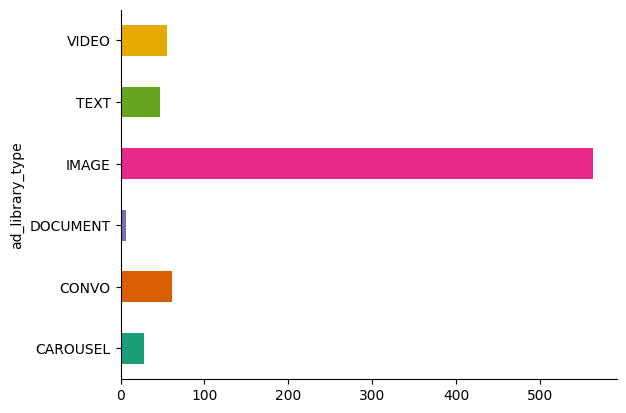

In [151]:
from matplotlib import pyplot as plt
import seaborn as sns
grouped_data_with_ctr.groupby('ad_library_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

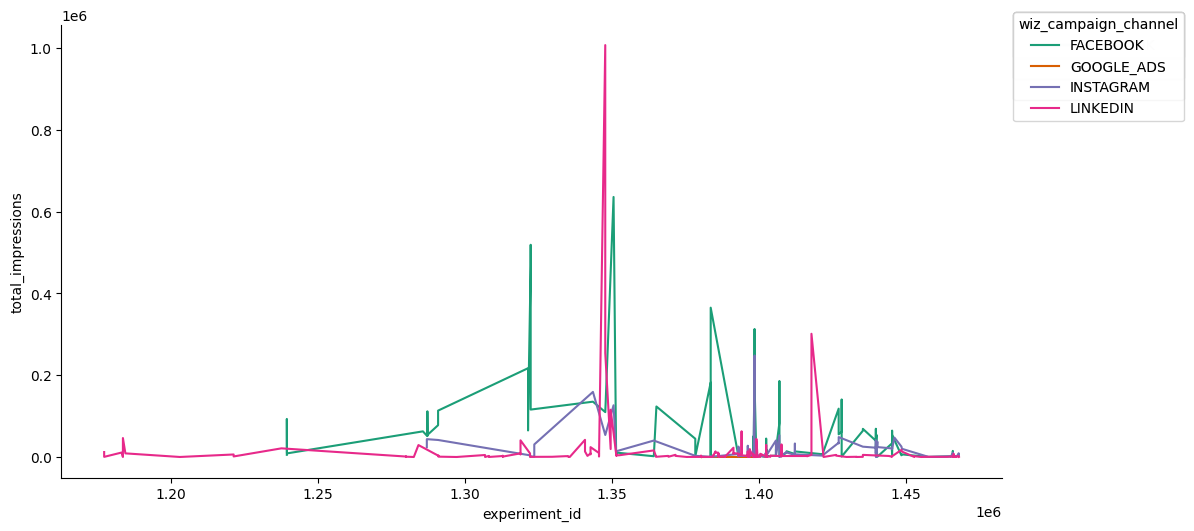

In [152]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['experiment_id']
  ys = series['total_impressions']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = grouped_data_with_ctr.sort_values('experiment_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('wiz_campaign_channel')):
  _plot_series(series, series_name, i)
  fig.legend(title='wiz_campaign_channel', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('experiment_id')
_ = plt.ylabel('total_impressions')

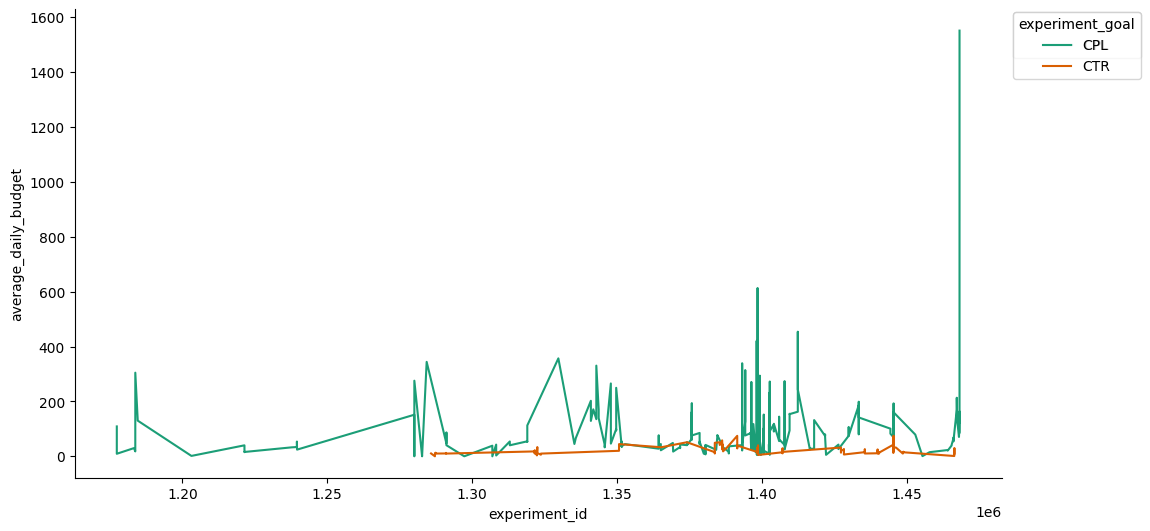

In [153]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['experiment_id']
  ys = series['average_daily_budget']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = grouped_data_with_ctr.sort_values('experiment_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('experiment_goal')):
  _plot_series(series, series_name, i)
  fig.legend(title='experiment_goal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('experiment_id')
_ = plt.ylabel('average_daily_budget')

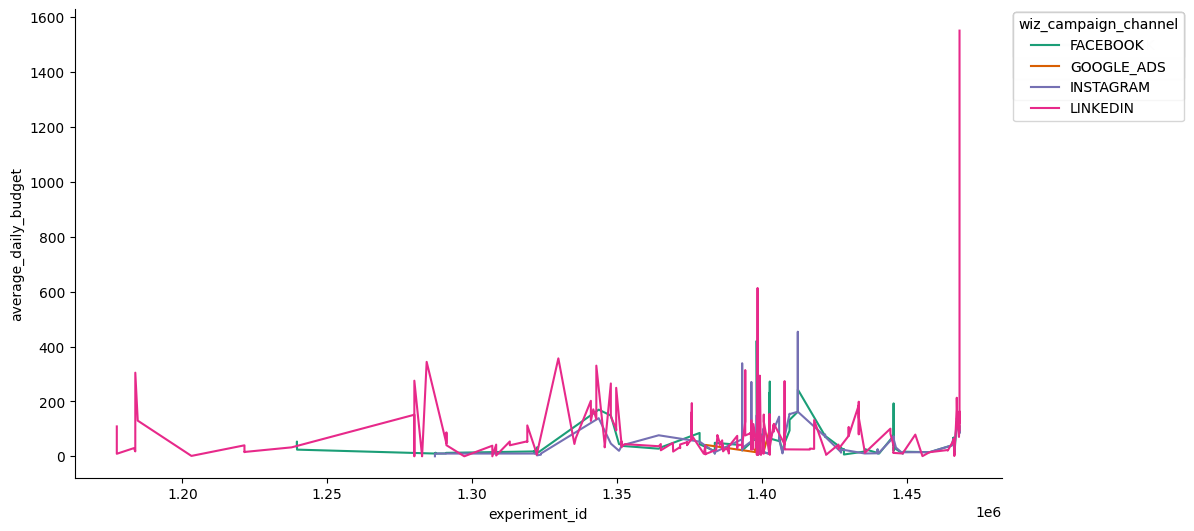

In [154]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['experiment_id']
  ys = series['average_daily_budget']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = grouped_data_with_ctr.sort_values('experiment_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('wiz_campaign_channel')):
  _plot_series(series, series_name, i)
  fig.legend(title='wiz_campaign_channel', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('experiment_id')
_ = plt.ylabel('average_daily_budget')

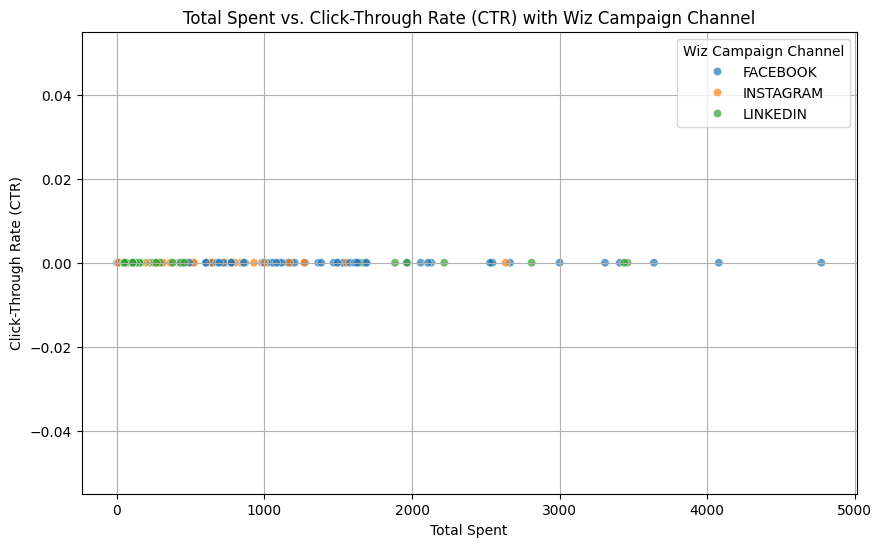

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data_with_ctr[grouped_data_with_ctr['experiment_goal'] == 'CTR'], x='total_spent', y='ctr_or_cpl', hue='wiz_campaign_channel', alpha=0.7)
plt.title('Total Spent vs. Click-Through Rate (CTR) with Wiz Campaign Channel')
plt.xlabel('Total Spent')
plt.ylabel('Click-Through Rate (CTR)')
plt.grid(True)
plt.legend(title='Wiz Campaign Channel')
plt.show()


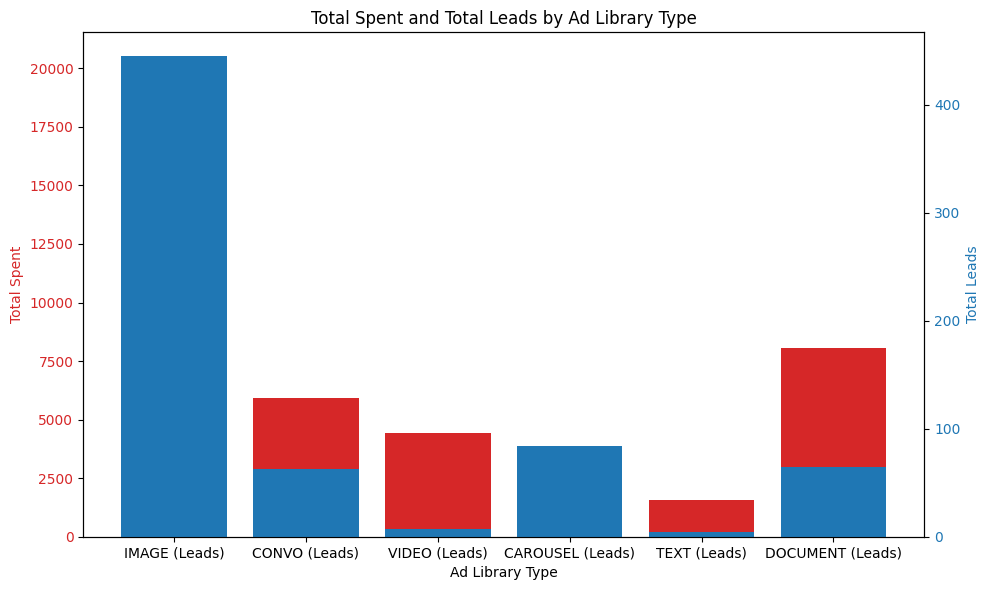

In [156]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# First axis for total_spent
color = 'tab:red'
ax1.set_xlabel('Ad Library Type')
ax1.set_ylabel('Total Spent', color=color)
ax1.bar(grouped_data_with_ctr['ad_library_type'] + ' (Spent)', grouped_data_with_ctr['total_spent'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axis that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Leads', color=color)
ax2.bar(grouped_data_with_ctr['ad_library_type'] + ' (Leads)', grouped_data_with_ctr['total_leads'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and custom x-axis tick labels
ax1.set_title('Total Spent and Total Leads by Ad Library Type')
fig.tight_layout()  # To make sure nothing is clipped
plt.xticks(rotation=45)
plt.show()

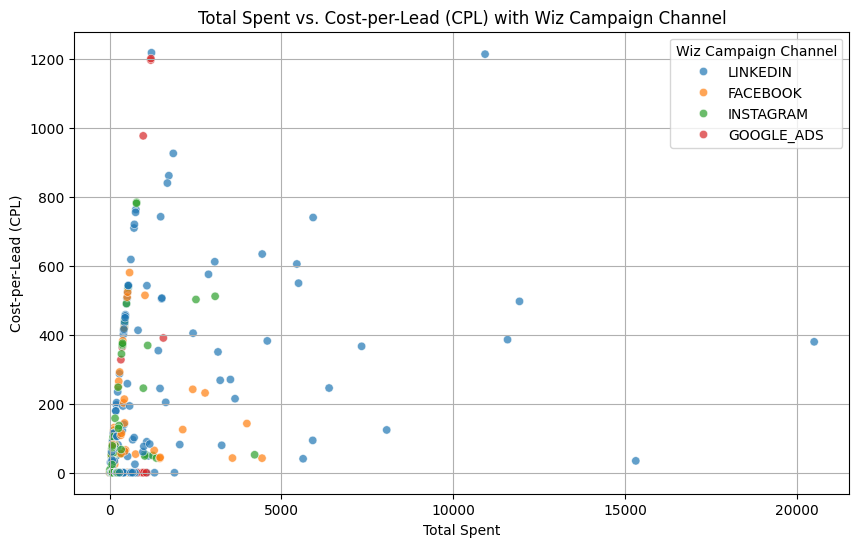

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data_with_ctr[grouped_data_with_ctr['experiment_goal'] == 'CPL'], x='total_spent', y='ctr_or_cpl', hue='wiz_campaign_channel', alpha=0.7)
plt.title('Total Spent vs. Cost-per-Lead (CPL) with Wiz Campaign Channel')
plt.xlabel('Total Spent')
plt.ylabel('Cost-per-Lead (CPL)')
plt.grid(True)
plt.legend(title='Wiz Campaign Channel')
plt.show()

We can observe that, There are absolutely no leads generated with CTR campaigns which are focused on brand awareness. The campaigns that are focused on CPL generated all the leads.

we can also observe that there is no correlation between the amount spent and CPL. as well as total number of leads to campaign and total impressions per campaign.

Since we have most of the categorical features, we can go ahead to use XGBoost model.

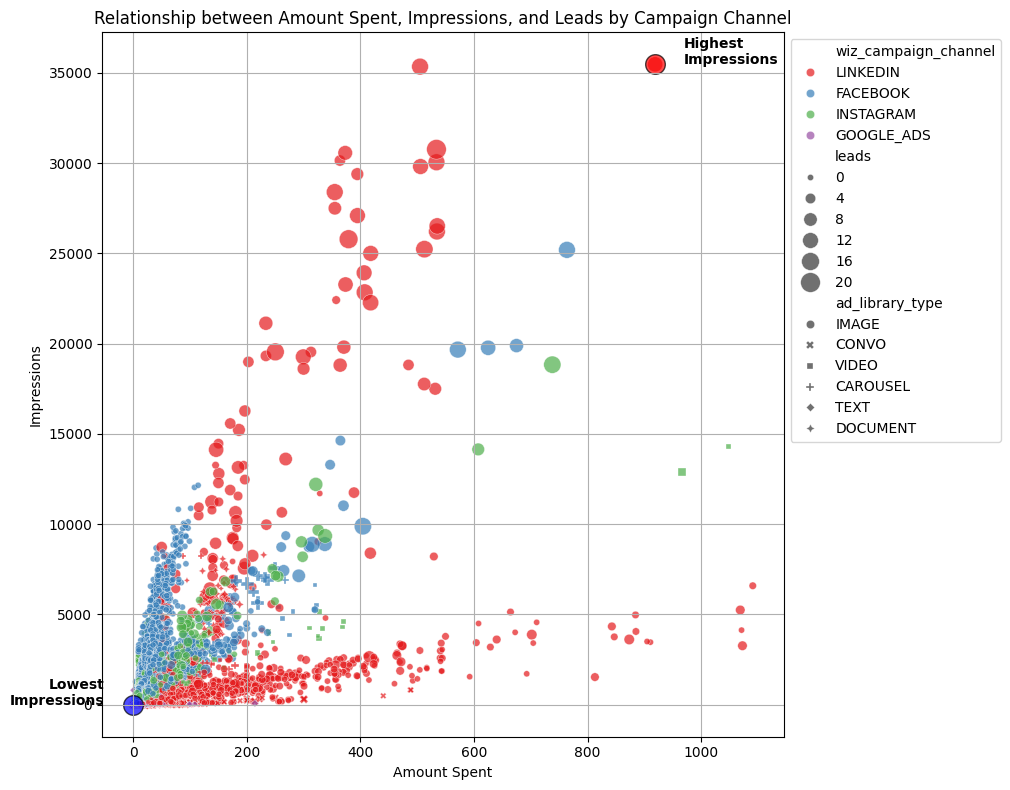

,spent,impressions,leads,wiz_campaign_channel,offer_library_type,ad_library_type
4065,918.9,35474.0,11,LINKEDIN,LG,IMAGE
3,0.0,0.0,0,LINKEDIN,LG,CONVO


In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
# Setting the plot size
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(data=dropped_df, x='spent', y='impressions', size='leads', hue='wiz_campaign_channel', style='ad_library_type', palette='Set1', sizes=(20, 200), alpha=0.7)
scatter.legend(loc='upper left', bbox_to_anchor=(1, 1))
max_impressions_index = dropped_df['impressions'].idxmax()
plt.scatter(dropped_df.loc[max_impressions_index, 'spent'], dropped_df.loc[max_impressions_index, 'impressions'], color='red', s=200, edgecolor='black', label='Highest Impressions', alpha=0.7)

min_impressions_index = dropped_df['impressions'].idxmin()
plt.scatter(dropped_df.loc[min_impressions_index, 'spent'], dropped_df.loc[min_impressions_index, 'impressions'], color='blue', s=200, edgecolor='black', label='Lowest Impressions', alpha=0.7)

plt.text(dropped_df.loc[max_impressions_index, 'spent'] + 50, dropped_df.loc[max_impressions_index, 'impressions'], 'Highest\nImpressions', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(dropped_df.loc[min_impressions_index, 'spent'] - 50, dropped_df.loc[min_impressions_index, 'impressions'], 'Lowest\nImpressions', horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.xlabel('Amount Spent')
plt.ylabel('Impressions')
plt.title('Relationship between Amount Spent, Impressions, and Leads by Campaign Channel')
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()
details_columns = ['spent', 'impressions', 'leads', 'wiz_campaign_channel', 'offer_library_type', 'ad_library_type']
dropped_df.loc[[max_impressions_index, min_impressions_index], details_columns]


Overall, after analysis, linkedIn Image campaigns does very well with impressions and leads.



1.   From my understanding, the CTR campaigns have generated no leads also no MQLS. which are currently not contributing to the model development.
2.   Since we dont have any samples that are CTR positive campaign and which generate MQLS, we can drop such samples.
3.   The reason being, since our goal is to predict MQLs, and CTR is a brand awareness campaign that do not majorly focus on MQLs, I'm considering to drop the CTR campaigns.



In [159]:
correlation_matrix = dropped_df[['leads', 'spent', 'impressions', 'mqls', 'daily_budget']].corr()
correlation_matrix

,leads,spent,impressions,mqls,daily_budget
leads,1.000000,0.475689,0.637202,0.313872,0.267868
spent,0.475689,1.000000,0.465614,0.314056,0.463244
impressions,0.637202,0.465614,1.000000,0.015762,0.146269
mqls,0.313872,0.314056,0.015762,1.000000,0.273787
daily_budget,0.267868,0.463244,0.146269,0.273787,1.000000


Since we are having weak correlation between variable use of models like linear regreesion can be mis-leading.

In [160]:
rows_to_drop = dropped_df[dropped_df['experiment_goal'] == 'CTR'].index
df_cleaned = dropped_df.drop(rows_to_drop)
dropped_df.drop(rows_to_drop, inplace=True)

In [161]:
dropped_df['mqls'].value_counts()

0    5374
1     389
2      85
3      17
4       8
5       2
Name: mqls, dtype: int64

In [162]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dropped_df, test_size=0.3, random_state=42)

In [163]:
train_df.isna().sum()

experiment_id              0
created_date               0
spent                      0
impressions                2
leads                      0
mqls                       0
daily_budget               0
experiment_goal            0
wiz_campaign_channel       0
offer_library_type         0
ad_library_type            0
ctr_cpl                 3390
dtype: int64

In [164]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Impute missing values in 'impressions' with the median (to minimize the impact of outliers)
imputer = SimpleImputer(strategy='median')
train_df['impressions'] = imputer.fit_transform(train_df[['impressions']])

# Encode categorical variables using One-Hot Encoding
categorical_features = ['experiment_goal', 'wiz_campaign_channel', 'offer_library_type', 'ad_library_type']
one_hot_encoder = OneHotEncoder(drop='first') # Dropping the first category to avoid dummy variable trap

# Apply One-Hot Encoding
data_encoded = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)

X = data_encoded.drop(['experiment_id', 'created_date', 'mqls'], axis=1)  # Features, dropping non-relevant and target columns
y = data_encoded['mqls']  # Target



In [165]:
X.shape

(4112, 14)

# Model- XGBoost

In [166]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

param_grid = {
    'n_estimators': np.arange(100, 150, 200),
    'learning_rate': [0.03, 0.05, 0.07, 0.3],
    'max_depth': np.arange(3, 13, 5),
    'subsample': [0.5, 0.6, 0.9],
    'colsample_bytree': [0.9, 1.0],
    'min_child_weight': [3, 4, 6],
    'gamma': [0, 0.2, 0.5],
}

grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.07, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.6}
Best score: 0.7955773418127031


In [167]:
test_data_encoded = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)

X_test = test_data_encoded.drop(['experiment_id', 'created_date', 'mqls'], axis=1)  # Features, dropping non-relevant and target columns
y_test = test_data_encoded['mqls']  # Target

best_model = grid_search.best_estimator_

# Now you can use best_model directly, if needed
_predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, _predictions)
r2 = r2_score(y_test, _predictions)

In [168]:
print(f'mse: {mse}, r2: {r2}')

mse: 0.02983348003738914, r2: 0.8052156112896663


In [169]:
import numpy as np
rounded_predictions = np.round(_predictions).astype(int)
rounded_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [170]:
unique_values, counts = np.unique(rounded_predictions, return_counts=True)

# Display the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 1625
Value: 1, Count: 116
Value: 2, Count: 16
Value: 3, Count: 5
Value: 4, Count: 1


In [171]:
unique_values, counts = np.unique(y_test, return_counts=True)

# Display the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 1628
Value: 1, Count: 110
Value: 2, Count: 17
Value: 3, Count: 4
Value: 4, Count: 3
Value: 5, Count: 1


# looking at the mismatches

In [172]:
mismatch_indices = np.where(rounded_predictions != y_test)[0]

mismatched_indices_actual = X_test.iloc[mismatch_indices].index

mismatch = dropped_df.loc[mismatched_indices_actual]
predictions_series = pd.Series(rounded_predictions, index=X_test.index)

mismatch['pred'] = predictions_series.loc[mismatched_indices_actual]
mismatch

,experiment_id,created_date,spent,impressions,leads,mqls,daily_budget,experiment_goal,wiz_campaign_channel,offer_library_type,ad_library_type,ctr_cpl,pred
7762,1402548,2023-10-17,346.850000,13293.0,4,1,69.36,CPL,FACEBOOK,LP,IMAGE,86.712500,0
6993,1398187,2023-10-09,200.120000,341.0,1,1,87.02,CPL,LINKEDIN,LG,CONVO,200.120000,0
12379,1177399,2023-07-14,56.030000,198.0,1,0,55.00,CPL,LINKEDIN,LG,IMAGE,56.030000,1
12420,1280040,2023-08-21,20.600000,14.0,4,4,200.00,CPL,LINKEDIN,LG,CONVO,5.150000,3
11620,1343629,2023-09-26,268.790000,9366.0,3,0,235.89,CPL,FACEBOOK,LG,IMAGE,89.596667,1
8461,1239529,2023-08-04,58.810000,1159.0,3,2,57.79,CPL,FACEBOOK,LG,IMAGE,19.603333,1
8821,1347833,2023-08-30,35.640000,1030.0,1,0,59.04,CPL,INSTAGRAM,LG,IMAGE,35.640000,1
9945,1399202,2023-10-18,10.300000,282.0,1,1,10.00,CPL,FACEBOOK,LG,IMAGE,10.300000,0
9124,1398440,2023-11-20,65.740000,57.0,2,1,500.00,CPL,LINKEDIN,LG,CONVO,32.870000,2
11409,1467998,2023-12-27,93.080000,1897.0,2,1,34.44,CPL,FACEBOOK,LG,IMAGE,46.540000,0


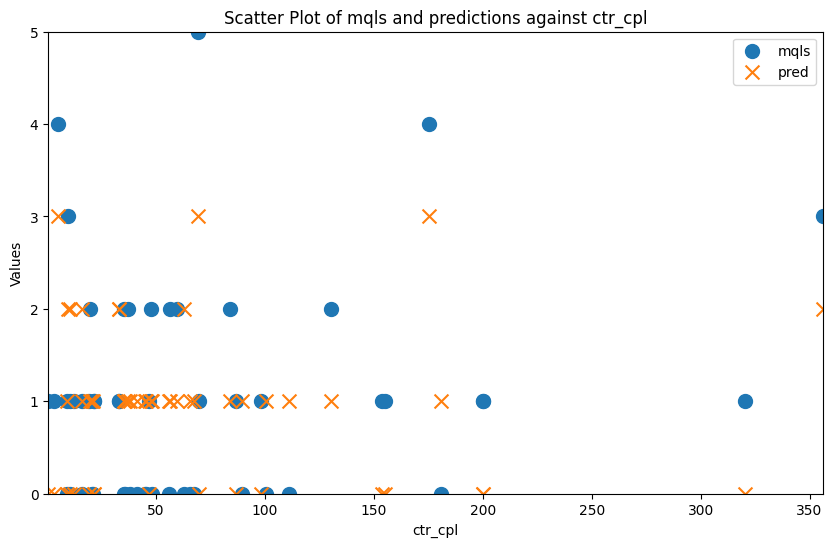

In [173]:
plt.figure(figsize=(10, 6))

# Scatter plot for y_col1 against x_col
plt.scatter(mismatch['ctr_cpl'], mismatch['mqls'], label='mqls', marker='o', s=100)  # 's' is the marker size

# Scatter plot for y_col2 against x_col
plt.scatter(mismatch['ctr_cpl'], mismatch['pred'], label='pred', marker='x', s=100)  # 's' is the marker size

plt.title('Scatter Plot of mqls and predictions against ctr_cpl')
plt.xlabel('ctr_cpl')
plt.ylabel('Values')
plt.ylim(mismatch['mqls'].min(), mismatch['mqls'].max())  # Setting y-axis range from 0 to 5

# If you want to explicitly set the x-axis range, you can do so with plt.xlim(min, max)
plt.xlim(mismatch['ctr_cpl'].min(), mismatch['ctr_cpl'].max())

plt.legend()

plt.show()

The above plot tells us most of mistakes made by the model are between CPL 0-100. which is not consistant. The reason might be because we havent normalised the data. Lets normalise the data and see the effect in change.



*   Since we are using a tree based model, the normalising of data is not required in general.





In [174]:
percentage_predictions = (sum(pred == actual for pred, actual in zip(rounded_predictions, y_test)) / rounded_predictions.shape[0] ) *100

print('pecentage of sample that are correctly predicted MQLs',percentage_predictions)


pecentage of sample that are correctly predicted MQLs 96.99376063528076


Since we dropped samples that:


*   Have no impressions but leads - considering offline campaigns
*   Have CTR as brand awareness focus, which do not directly lead to MQLs.

I wanted to build a model considering these samples and look at the difference we get regarding the predictions. Although, the previous assumptions taken are correct, I just wanted to do a quich A/B testing.



In [175]:
undropped_df = df.copy()
undropped_train_df, undropped_test_df = train_test_split(undropped_df, test_size=0.3, random_state=42)
imputer = SimpleImputer(strategy='median')
undropped_train_df['impressions'] = imputer.fit_transform(undropped_train_df[['impressions']])
categorical_features = ['experiment_goal', 'wiz_campaign_channel', 'offer_library_type', 'ad_library_type']
one_hot_encoder = OneHotEncoder(drop='first')
undropped_data_encoded = pd.get_dummies(undropped_train_df, columns=categorical_features, drop_first=True)
undropped_X = undropped_data_encoded.drop(['experiment_id', 'created_date', 'mqls'], axis=1)
undropped_y = undropped_data_encoded['mqls']
undropped_xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

undropped_param_grid = {
    'n_estimators': np.arange(100, 150, 200),
    'learning_rate': [0.03, 0.05, 0.07, 0.3],
    'max_depth': np.arange(3, 13, 5),
    'subsample': [0.5, 0.6, 0.9],
    'colsample_bytree': [0.9, 1.0],
    'min_child_weight': [3, 4, 6],
    'gamma': [0, 0.2, 0.5],
}

undropped_grid_search = GridSearchCV(estimator=undropped_xgb_regressor, param_grid=undropped_param_grid, cv=3, n_jobs=-1, verbose=2)
undropped_grid_search.fit(undropped_X, undropped_y)

print("Best parameters:", undropped_grid_search.best_params_)
print("Best score:", undropped_grid_search.best_score_)

undropped_test_data_encoded = pd.get_dummies(undropped_test_df, columns=categorical_features, drop_first=True)
undropped_X_test = undropped_test_data_encoded.drop(['experiment_id', 'created_date', 'mqls'], axis=1)
undropped_y_test = undropped_test_data_encoded['mqls']

undropped_best_model = undropped_grid_search.best_estimator_
undropped_predictions = undropped_best_model.predict(undropped_X_test)

undropped_mse = mean_squared_error(undropped_y_test, undropped_predictions)
undropped_r2 = r2_score(undropped_y_test, undropped_predictions)
print(f'mse: {undropped_mse}, r2: {undropped_r2}')

undropped_rounded_predictions = np.round(undropped_predictions).astype(int)
undropped_percentage_predictions = (sum(pred == actual for pred, actual in zip(undropped_rounded_predictions, undropped_y_test)) / undropped_rounded_predictions.shape[0] ) *100

print('pecentage of sample that are correctly predicted MQLs',undropped_percentage_predictions)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.07, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.5}
Best score: 0.7975263281382899
mse: 0.01837246813203382, r2: 0.795755620620808
pecentage of sample that are correctly predicted MQLs 98.55409243480506


In [176]:
unique_values, counts = np.unique(undropped_rounded_predictions, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 3692
Value: 1, Count: 145
Value: 2, Count: 28
Value: 3, Count: 6
Value: 4, Count: 2


In [177]:
unique_values, counts = np.unique(undropped_y_test, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 3703
Value: 1, Count: 133
Value: 2, Count: 27
Value: 3, Count: 7
Value: 4, Count: 2
Value: 5, Count: 1


The model perform great when the samples that are not contributing to MQLs are not dropped, this is evident because the more number of samples the more percentage of samples were correctly detected even if they aren't contibuting to MQLs.

I would prefer previous model that gave us 96% percent of the samples gave us correct MQLs prediction.

The percentage of samples predicted are definitly not the metric we are looking at.

*   MSE - mean squared error
*   r2 -  R² might be less intuitive or useful, especially if the range of MQL counts is not very large. since our range is 0-5.



